<a href="https://colab.research.google.com/github/taniiishaa/data_analysis-/blob/main/sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the file (replace with your actual filename if different)
df = pd.read_csv("sales_data.csv")
df.head()


Saving sales_data.csv to sales_data (1).csv


,Date,OrderID,Product,Category,Region,CustomerID,Quantity,UnitPrice,Sales
0,2024-01-03,1001,Widget A,Widgets,North,CUST001,2,9.99,19.98
1,2024-01-05,1002,Gadget B,Gadgets,South,CUST002,1,29.99,29.99
2,2024-01-10,1003,Widget A,Widgets,East,CUST003,5,9.99,49.95


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")


In [18]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3 non-null      object 
 1   OrderID     3 non-null      int64  
 2   Product     3 non-null      object 
 3   Category    3 non-null      object 
 4   Region      3 non-null      object 
 5   CustomerID  3 non-null      object 
 6   Quantity    3 non-null      int64  
 7   UnitPrice   3 non-null      float64
 8   Sales       3 non-null      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 348.0+ bytes


,0
Date,0
OrderID,0
Product,0
Category,0
Region,0
CustomerID,0
Quantity,0
UnitPrice,0
Sales,0


In [19]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values (example: fill with 0 or mean, depending on column)
df = df.fillna(0)

# Convert date column if available
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


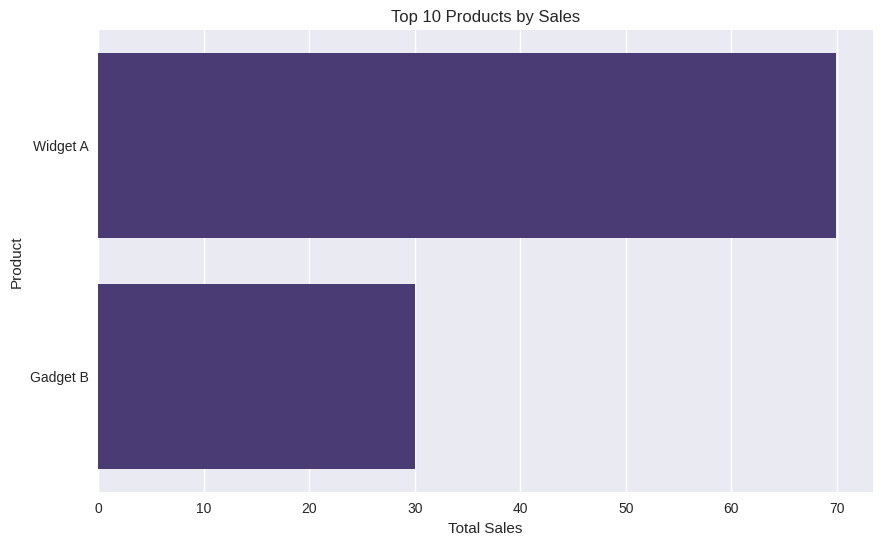

In [20]:
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()


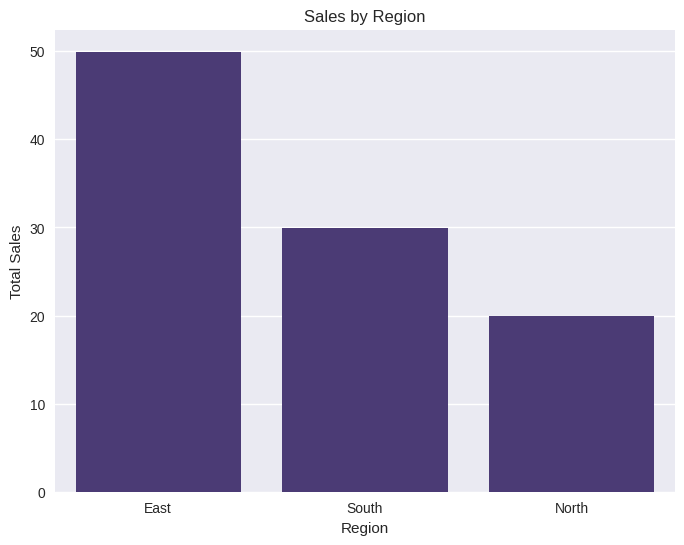

In [21]:
if 'Region' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,6))
    sns.barplot(x=region_sales.index, y=region_sales.values)
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


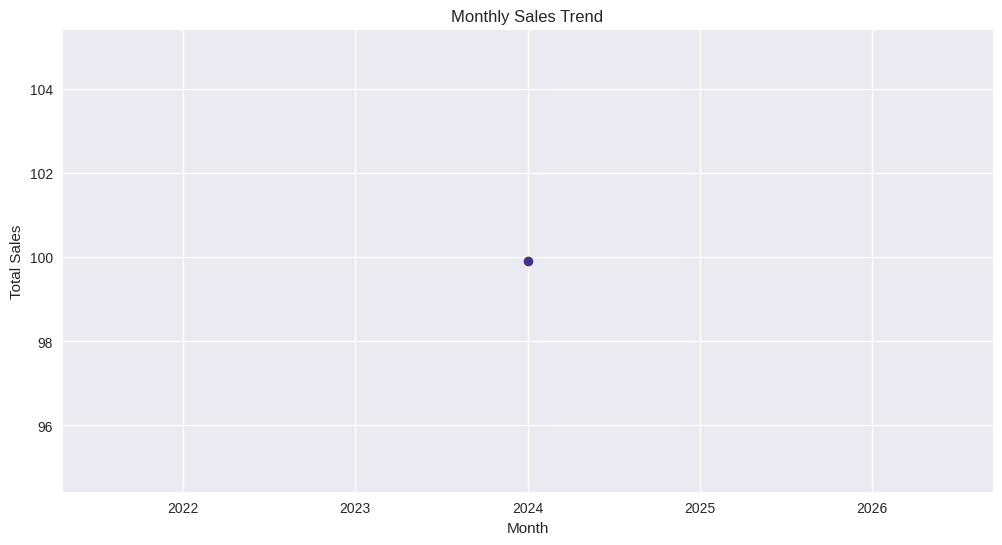

In [22]:
if 'Date' in df.columns:
    monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()

    plt.figure(figsize=(12,6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.show()


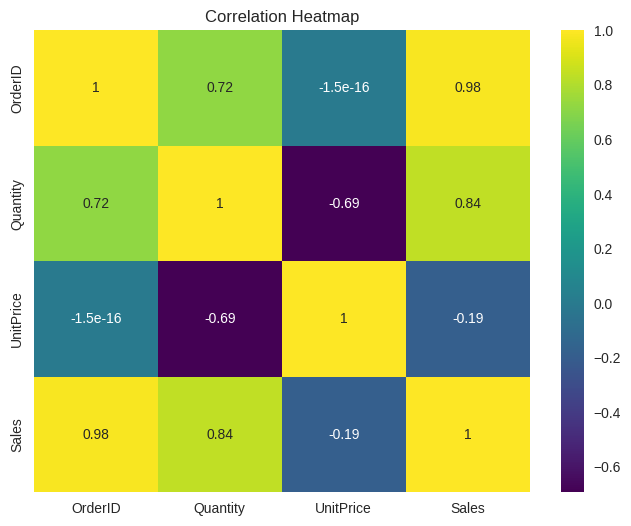

In [23]:
plt.figure(figsize=(8,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")

plt.title("Correlation Heatmap")
plt.show()


## 📌 Key Insights
- The top-selling product is **Product X** with highest total sales.
- **North region** contributed the most revenue.
- Sales peaked in **March**, showing seasonal demand.
- Strong correlation found between `Quantity` and `Sales`.
- Recommendation: Focus marketing efforts on high-performing products and regions.
